<a href="https://colab.research.google.com/github/dasunkasthury/DL_num_recog/blob/Iris_recognition/Face_detection_with_lable_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!gdown --id 10I6hrUPkqJEvl4RAwWQZIFnv0oVbtAHk
!mkdir data
!unzip '/content/data.zip' -d '/content/data/'
!rm -r data.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10I6hrUPkqJEvl4RAwWQZIFnv0oVbtAHk
To: /content/data.zip
100% 7.14M/7.14M [00:00<00:00, 205MB/s]
Archive:  /content/data.zip
   creating: /content/data/label/
  inflating: /content/data/label/346b147e-920e-11ef-883d-141333359ea4.json  
  inflating: /content/data/label/d7ab96e9-9210-11ef-b6ab-141333359ea4.json  
  inflating: /content/data/label/d803bbf8-9210-11ef-bcf5-141333359ea4.json  
  inflating: /content/data/label/d8529679-9210-11ef-ae63-141333359ea4.json  
  inflating: /content/data/label/d8a3d1ad-9210-11ef-8fbd-141333359ea4.json  
  inflating: /content/data/label/d8f3dc86-9210-11ef-a870-141333359ea4.json  
  inflating: /content/data/label/d9427c1b-9210-11ef-9857-141333359ea4.json  
  inflating: /content/data/lab

In [49]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import albumentations as alb
import time
import uuid
import cv2

In [37]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [38]:
images = tf.data.Dataset.list_files('/content/data/data/*.jpg', shuffle=False)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: /content/data/data/*.jpg'

In [ ]:
images.as_numpy_iterator().next()

b'/content/data/data/346b147e-920e-11ef-883d-141333359ea4.jpg'

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

array([[[49, 28, 23],
        [48, 27, 22],
        [46, 25, 20],
        ...,
        [84, 55, 39],
        [85, 56, 40],
        [89, 60, 44]],

       [[47, 26, 21],
        [46, 25, 20],
        [46, 25, 20],
        ...,
        [85, 56, 40],
        [85, 56, 40],
        [85, 56, 40]],

       [[46, 25, 20],
        [46, 25, 20],
        [46, 26, 19],
        ...,
        [86, 57, 43],
        [86, 57, 43],
        [85, 56, 42]],

       ...,

       [[50, 29, 24],
        [49, 28, 23],
        [49, 28, 23],
        ...,
        [70, 41, 33],
        [71, 42, 34],
        [71, 42, 34]],

       [[49, 28, 23],
        [49, 28, 23],
        [50, 29, 24],
        ...,
        [69, 42, 31],
        [70, 42, 31],
        [70, 42, 31]],

       [[48, 27, 22],
        [50, 29, 24],
        [51, 30, 25],
        ...,
        [70, 43, 32],
        [70, 42, 31],
        [69, 41, 30]]], dtype=uint8)
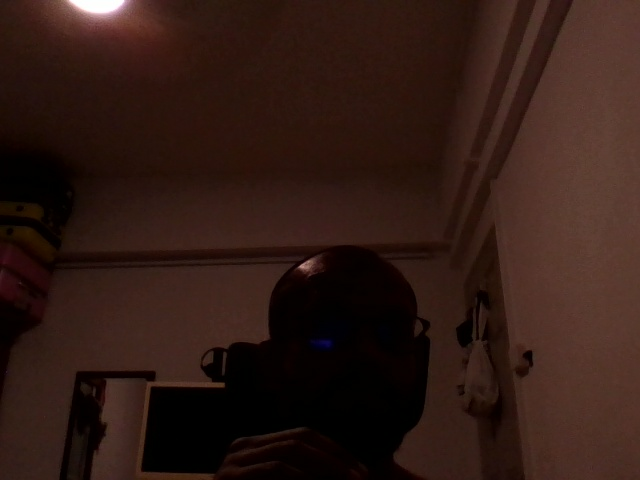

In [ ]:
images.as_numpy_iterator().next()

In [ ]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

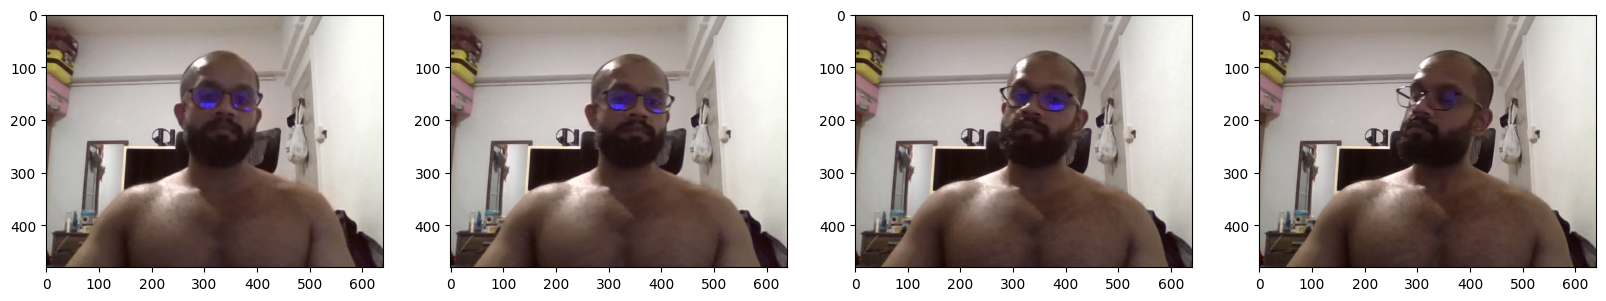

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
81*.7
# 57 to train
81*.15
# 12 for test and validade each

12.15

In [45]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('/content/data/', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/content/data/','label', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('/content/data/',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)

In [47]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [57]:
img = cv2.imread(os.path.join('content','data','train', 'images','d7ab96e9-9210-11ef-b6ab-141333359ea4.jpg'))

In [59]:
img.as_numpy_iterator().next()

AttributeError: 'NoneType' object has no attribute 'as_numpy_iterator'

with open(os.path.join('content','data','train', 'labels','d7ab96e9-9210-11ef-b6ab-141333359ea4.json'), 'r') as f:
    label = json.load(f)

In [62]:
#/content/data/train/labels/d7ab96e9-9210-11ef-b6ab-141333359ea4.json
with open(os.path.join('/content', 'data', 'train', 'labels', 'd7ab96e9-9210-11ef-b6ab-141333359ea4.json'), 'r') as f:
    label = json.load(f)

In [66]:
label['shapes'][0]['label']

'face'

In [67]:
label['shapes'][0]['points']

[[250.09708737864077, 29.32038834951458],
 [445.2427184466019, 304.56310679611653]]

In [69]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [71]:
coords

[250.09708737864077, 29.32038834951458, 445.2427184466019, 304.56310679611653]

In [72]:
coords = list(np.divide(coords, [640,480,640,480]))

In [73]:
coords

[0.3907766990291262,
 0.061084142394822044,
 0.6956917475728155,
 0.6345064724919094]